# 1. Food Waste Emissions and Sustainability

## Index

- [1. Food Waste Emissions and Sustainability](#1-main-section-one)
  - [1.1 Notebook Overview](#1.1-subsection-one)
  - [1.2 Problem Statement and Hypotheses](#1.2-introduction)
    - [Problem Statement](#1.2-problem-statement)
    - [1.2.2 1st Hypothesis](#1.2.1-hypotheses)
    - [1.2.3 2nd Hypothesis](#1.2.2-hypotheses)
    - [1.2.4 3rd Hypothesis](#1.2.3-hypotheses)
  - [1.3 Objectives](#1.3-data-sources)

- [2. Main file](#2-importing-libraries-and-datasets)
  - [2.1 Importing Libraries and Datasets](#2.1-importing-libraries)
  - [2.2 Data Merging](#2.2-data-merging)
  - [1.3 Importing Libraries and Datasets](#1.3-importing-libraries-and-datasets)

- [3. Hypotheses Testing using EDA](#3-hypotheses-testing-using-eda)
  - [3.1 Hypothesis 1](#3.1-hypothesis-1)
    - [3.1.1 Visualization Methods](#3.1.1-hypothesis-1.1)
  - [3.2 Hypothesis 2](#3.2-hypothesis-2)
    - [3.2.1 Visualization Methods](#3.2.1-hypothesis-2.1)
  - [3.3 Hypothesis 3](#3.3-hypothesis-3)
    - [3.3.1 Visualization Methods](#3.3.1-hypothesis-3.1)
  



## 1.1 Notebook Overview

- In this notebook, we procceeded to merge the two datasets that have been previously cleaned and preprocessed. Both datasets used are from the FAO (Food and Agriculture Organization of the United Nations) and the respective links can be found on the readme.file and on both data wrangling files.

- The first dataset contains information emissions and type of activity associated with food production. The second dataset contains information about food waste by commodity (food) and value chain stage. Both datasets are related to each other through country and year, and later by activity and value chain stage that will be used to merge the datasets.

## 1.2 Problem Statement and Hypotheses

### Problem Statement:

**How can we reduce food waste and simultaneously reduce emissions to improve sustainability and efficiency in the food supply chain?**

### 1.2.1 Hypothesis 1 

- Retail and wholesales market activities are the value chain stage that most contribute to food loss and corresponding emissions.

### 1.2.2 Hypothesis 2

- Different commodities experience varying loss percentages across different stages of the food supply chain, indicating potential inefficiencies specific to each stage.

### 1.2.3 Hypothesis 3

- Emissions reduction potential by targeting specific supply chain stages.

## 1.2 Objectives

- The merged dataset will be used to analyze the relationship between food waste/emissions with value chain stage. The main goal of our EDA is to identify critical stages of the value chain and activities that are associated with high emissions and food waste.

- The insights from this analysis can be used to inform policy makers, companies, and consumers about the environmental impact of food production and consumption. The results can also be used to identify opportunities for reducing emissions and food waste in the food system.

# 2. Main file

### 2.1 Importing Libraries and Datasets

In [1]:
# Import relevant libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gdown
from functions import map_stages

#emissions_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Emissions_dataset.csv')
#foodwaste_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Food-Waste_dataset.csv')

#Importing the datasets from Google Drive

try:
    emissions_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Emissions_dataset.csv')
    foodwaste_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Food-Waste_dataset.csv')

except:
    file_id1 = '1dlQkjoNh_qA2ScH7l3aII43feE35qhcb'
    url1 = f'https://drive.google.com/uc?id={file_id}'
    file_id2 = '16OnMxm4yDSwtsadnp0l08V4nQm7m_tr_'
    url2 = f'https://drive.google.com/uc?id={file_id}'
    output_path1 = '/Users/alexandreribeiro/Desktop/Emissions_dataset.csv'  # Cambia la extensión si no es un CSV
    output_path2 = '/Users/alexandreribeiro/Desktop/Food-Waste_dataset.csv'  # Cambia la extensión si no es un CSV
    gdown.download(url1, output_path1, quiet=False)
    gdown.download(url2, output_path2, quiet=False)
    emissions_df = pd.read_csv(output_path1)
    foodwaste_df = pd.read_csv(output_path2)


# Change column value to emissions_quantity

emissions_df.rename(columns={'value':'emissions_quantity'}, inplace=True)

# Check the first 5 rows of the emissions dataset

emissions_df.head()

,country,year,element,item,unit,emissions_quantity
0,Angola,2010,Carbon Dioxide (CO2),Agrifood Systems Waste Disposal,kt,1134.35
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57
2,Angola,2010,Carbon Dioxide (CO2),Food Household Consumption,kt,281.49
3,Angola,2010,Carbon Dioxide (CO2),Food Packaging,kt,8.13
4,Angola,2010,Carbon Dioxide (CO2),Food Processing,kt,0.00


In [2]:
# Check the first 5 rows of the food waste dataset

foodwaste_df.head()

,country,year,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Farm,Maize (corn),3.6
1,Angola,2010,Farm,Millet,1.7
2,Angola,2010,Farm,Rice,1.5
3,Angola,2010,Farm,Sorghum,3.0
4,Angola,2010,Farm,Wheat,4.2


In [3]:
# In order to merge the two datasets, we can create a mapping based on the logical correspondence between the food_supply_stage and items.

# Get unique values of 'food_supply_stage' and 'item'

food_supply_stages = foodwaste_df['food_supply_stage'].unique()
items = emissions_df['item'].unique()

food_supply_stages, items

(array(['Farm', 'Harvest', 'Shelling and processing', 'Storage',
        'Transport', 'Households', 'Retail, wholesale and market',
        'Whole supply chain', 'Distribution and export', 'Packing'],
       dtype=object),
 array(['Agrifood Systems Waste Disposal', 'Crop Residues',
        'Food Household Consumption', 'Food Packaging', 'Food Processing',
        'Food Retail', 'Food Transport', 'Manure Management',
        'Manure applied to Soils', 'Manure left on Pasture',
        'Rice Cultivation', 'Synthetic Fertilizers'], dtype=object))

## 2.2 Data Merging

- In order to merge the datasets, we needed to condense the item columns and food supply stage into one. To accomplish that we used a logical correspondence between the values from both variables.

- The final dataset were later merged using the country, year and food supply stage as the key variables. 


In [4]:
# Create a mapping dictionary for food_supply_stage to item

mapping = {
    'Farm': ['Crop Residues', 'Rice Cultivation', 'Synthetic Fertilizers'],
    'Harvest': ['Crop Residues'],
    'Shelling and processing': ['Food Processing'],
    'Storage': ['Food Processing'],  
    'Transport': ['Food Transport'],
    'Households': ['Food Household Consumption'],
    'Retail, wholesale and market': ['Food Retail'],
    'Whole supply chain': ['Food Transport'],  
    'Distribution and export': ['Food Transport'],
    'Packing': ['Food Packaging']
}

#Function to apply mapping and filter the emissions dataset

def map_stages(row):
    for stage, items in mapping.items():
        if row['item'] in items:
            return stage
    return np.nan

# Apply the mapping function to create a new column in the emissions dataset

emissions_df['food_supply_stage'] = emissions_df.apply(map_stages, axis=1)

# Check the first 5 rows of the updated emissions dataset

emissions_df.head()



,country,year,element,item,unit,emissions_quantity,food_supply_stage
0,Angola,2010,Carbon Dioxide (CO2),Agrifood Systems Waste Disposal,kt,1134.35,NaN
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm
2,Angola,2010,Carbon Dioxide (CO2),Food Household Consumption,kt,281.49,Households
3,Angola,2010,Carbon Dioxide (CO2),Food Packaging,kt,8.13,Packing
4,Angola,2010,Carbon Dioxide (CO2),Food Processing,kt,0.00,Shelling and processing


In [5]:
# Merge the two datasets on 'country' 'year' and 'food_supply_stage'

merged_df = pd.merge(emissions_df, foodwaste_df, on=['country', 'year', 'food_supply_stage'])

# Check the first 5 rows of the merged dataset

merged_df.head()

,country,year,element,item,unit,emissions_quantity,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Maize (corn),3.6
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Millet,1.7
2,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Rice,1.5
3,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Sorghum,3.0
4,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Wheat,4.2


In [6]:
#Describe value and loss_percentage

merged_df[['emissions_quantity', 'loss_percentage']].describe().round(2)

,emissions_quantity,loss_percentage
count,18489.00,18489.00
mean,1579.97,3.29
std,11347.12,4.50
min,0.00,0.00
25%,0.04,1.50
50%,2.93,2.00
75%,124.95,3.50
max,171822.50,63.00


In [7]:
#Group by country and average of years and get the commodity = 'Meat of cattle with bone'

grouped_df = merged_df[merged_df['commodity'] == 'Meat of cattle with the bone, fresh or chilled']

# Check the first 5 rows of the grouped dataset

grouped_df.head(10)

,country,year,element,item,unit,emissions_quantity,food_supply_stage,commodity,loss_percentage
3067,Canada,2014,Carbon Dioxide (CO2),Food Retail,kt,2375.82,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3068,Canada,2014,Methane (CH4),Food Retail,kt,0.07,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3069,Canada,2014,Nitrous Oxide (N2O),Food Retail,kt,0.02,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3409,China,2013,Carbon Dioxide (CO2),Crop Residues,kt,30332.01,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3410,China,2013,Carbon Dioxide (CO2),Food Processing,kt,137130.58,Shelling and processing,"Meat of cattle with the bone, fresh or chilled",1.1
3411,China,2013,Carbon Dioxide (CO2),Food Retail,kt,40331.61,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.0
3412,China,2013,Carbon Dioxide (CO2),Rice Cultivation,kt,150439.04,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3413,China,2013,Carbon Dioxide (CO2),Synthetic Fertilizers,kt,170842.64,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3414,China,2013,Methane (CH4),Food Processing,kt,292.74,Shelling and processing,"Meat of cattle with the bone, fresh or chilled",1.1
3415,China,2013,Methane (CH4),Food Retail,kt,1.29,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.0


## 3. Hypotheses Testing using EDA

### 3.1 Hypothesis 1

- Retail and wholesales market activities are the value chain stage that most contribute to food loss and corresponding emissions.

In [8]:
# Pivot table with food_supply_stage in index andloss value and loss_percentage as values

pivot_table = merged_df.pivot_table(index='food_supply_stage', values=['emissions_quantity', 'loss_percentage'], aggfunc='mean').round(2)

pivot_table

# In the same table, calculate the percentage of emissions for each stage

pivot_table['loss_emissions'] = ((pivot_table['loss_percentage'] / 100) * pivot_table['emissions_quantity']).round(2)

# Reorder the columns

pivot_table = pivot_table[['emissions_quantity', 'loss_percentage', 'loss_emissions']]

pivot_table


,emissions_quantity,loss_percentage,loss_emissions
food_supply_stage,,,
Farm,2288.07,3.29,75.28
Households,2681.07,11.39,305.37
Packing,376.40,7.06,26.57
"Retail, wholesale and market",3278.14,10.56,346.17
Shelling and processing,160.11,3.05,4.88
Transport,254.91,1.62,4.13


### 3.2.1 Visualization Methods

- We used countplots to visualize the average loss percentage by food supply stage and activity. The results show that households have the highest average loss percentage, followed by retail and wholesale markets.

- Used also a stacked barplot to visualize the average emissions by food supply stage. The results shows that Retail and wholesale and market have the highest average emissions.

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_94131/1210556144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loss_percentage', y='food_supply_stage', data=pivot_table_reset, palette='viridis')


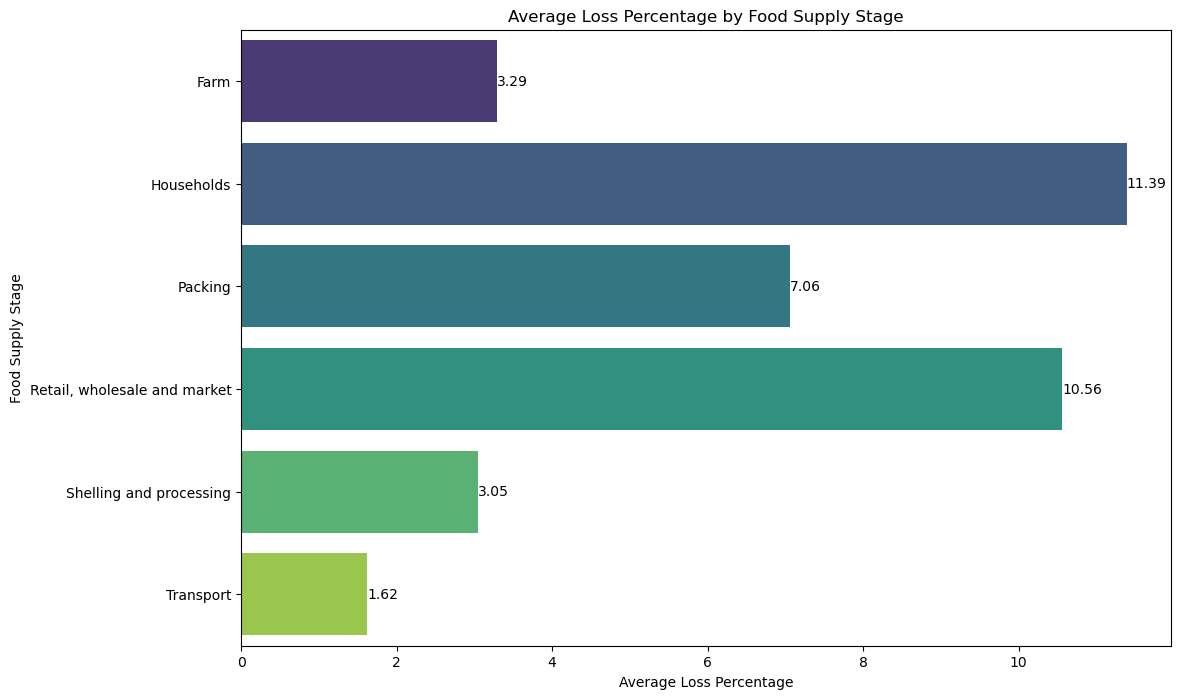

In [9]:
pivot_table_reset = pivot_table.reset_index()

# Count plot based on the pivot table
plt.figure(figsize=(12, 8))
sns.barplot(x='loss_percentage', y='food_supply_stage', data=pivot_table_reset, palette='viridis')
plt.title('Average Loss Percentage by Food Supply Stage')
plt.xlabel('Average Loss Percentage')
plt.ylabel('Food Supply Stage')

# Annotate values on the bars
for index, value in enumerate(pivot_table_reset['loss_percentage']):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.show()

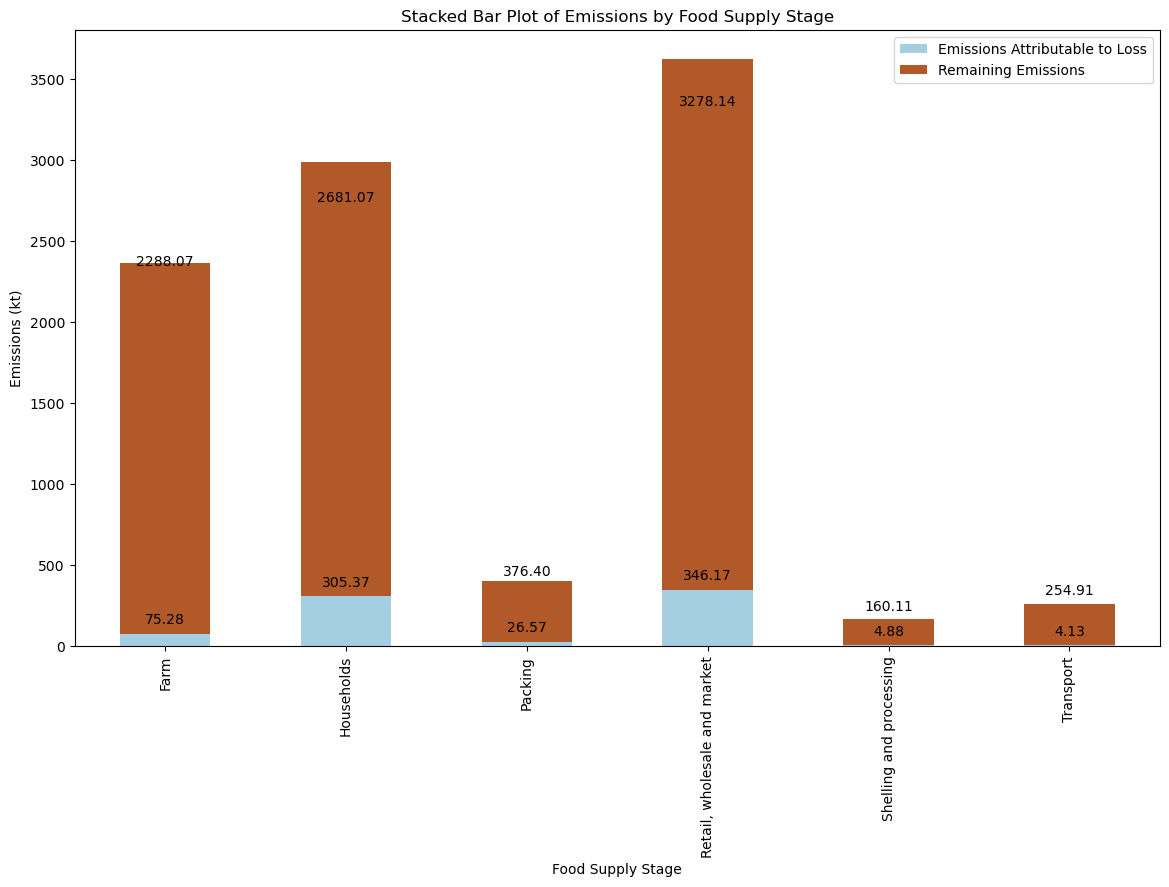

In [10]:
# Plot the stacked bar plot with annotations
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bars
pivot_table[['loss_emissions', 'emissions_quantity']].plot(kind='bar', stacked=True, ax=ax, colormap='Paired')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set titles and labels
ax.set_title('Stacked Bar Plot of Emissions by Food Supply Stage')
ax.set_xlabel('Food Supply Stage')
ax.set_ylabel('Emissions (kt)')
ax.legend(['Emissions Attributable to Loss', 'Remaining Emissions'])
plt.xticks(rotation=90)

# Show plot
plt.show()

### 3.2 Hypothesis 2

- Different commodities experience varying loss percentages across different stages of the food supply chain, indicating potential inefficiencies specific to each stage.

In [11]:
# Select top commodities by average loss percentage
top_commodities = merged_df.groupby('commodity')['loss_percentage'].mean().nlargest(5).index

# Filter the dataset to include only the top commodities
filtered_df = merged_df[merged_df['commodity'].isin(top_commodities)]

# Display the filtered dataset
filtered_df.head()

,country,year,element,item,unit,emissions_quantity,food_supply_stage,commodity,loss_percentage
719,Australia,2013,Carbon Dioxide (CO2),Food Processing,kt,4314.90,Shelling and processing,"Sweet corn, frozen",38.5
737,Australia,2013,Methane (CH4),Food Processing,kt,1.84,Shelling and processing,"Sweet corn, frozen",38.5
755,Australia,2013,Nitrous Oxide (N2O),Food Processing,kt,0.10,Shelling and processing,"Sweet corn, frozen",38.5
769,Australia,2015,Carbon Dioxide (CO2),Food Household Consumption,kt,4476.58,Households,"Sweet corn, frozen",27.0
776,Australia,2015,Methane (CH4),Food Household Consumption,kt,0.20,Households,"Sweet corn, frozen",27.0


In [12]:
# Summary statistics for loss percentages by commodity and stage
summary_stats = filtered_df.groupby(['food_supply_stage', 'commodity'])['loss_percentage'].describe().round(2)
summary_stats

count  mean  std  \
food_supply_stage            commodity                                       
Households                   Sweet corn, frozen             3.0  27.0  0.0   
Retail, wholesale and market Apricots                       3.0  30.0  0.0   
                             Plums and sloes                3.0  21.5  0.0   
                             Pumpkins, squash and gourds    3.0  20.6  0.0   
                             Watermelons                    3.0  25.4  0.0   
Shelling and processing      Sweet corn, frozen             3.0  38.5  0.0   
Transport                    Pumpkins, squash and gourds    3.0  55.0  0.0   

                                                           min   25%   50%  \
food_supply_stage            commodity                                       
Households                   Sweet corn, frozen           27.0  27.0  27.0   
Retail, wholesale and market Apricots                     30.0  30.0  30.0   
                             Plums and sloes              21.5  21.5  21.5   
                             Pumpkins, squash and gourds  20.6  20.6  20.6   
                             Watermelons                  25.4  25.4  25.4   
Shelling and processing      Sweet corn, frozen           38.5  38.5  38.5   
Transport                    Pumpkins, squash and gourds  55.0  55.0  55.0   

                                                           75%   max  
food_supply_stage            commodity                                
Households                   Sweet corn, frozen           27.0  27.0  
Retail, wholesale and market Apricots                     30.0  30.0  
                             Plums and sloes              21.5  21.5  
                             Pumpkins, squash and gourds  20.6  20.6  
                             Watermelons                  25.4  25.4  
Shelling and processing      Sweet corn, frozen           38.5  38.5  
Transport                    Pumpkins, squash and gourds  55.0  55.0

In [13]:
# Pivot table for average loss percentage by commodity and stage
pivot_table_loss_percentage = filtered_df.pivot_table(index='food_supply_stage', columns='commodity', values='loss_percentage', aggfunc='mean').round(2)

pivot_table_loss_percentage

commodity,Apricots,Plums and sloes,"Pumpkins, squash and gourds","Sweet corn, frozen",Watermelons
food_supply_stage,,,,,
Households,NaN,NaN,NaN,27.0,NaN
"Retail, wholesale and market",30.0,21.5,20.6,NaN,25.4
Shelling and processing,NaN,NaN,NaN,38.5,NaN
Transport,NaN,NaN,55.0,NaN,NaN


### 3.2.1 Visualization Methods

- We used bar plots to visualize the percentage of food loss by commodity and value chain stage.

- Used a heatmap to visualize the correlation between average food loss by commodity and value chain stage.

- Sunburst chart for hierarchical data visualization.

In [14]:
# Bar plot for average loss percentage by commodity and stage
fig = px.bar(filtered_df, x='loss_percentage', y='commodity', color='food_supply_stage', barmode='group',
             title='Average Loss Percentage by Commodity and Food Supply Stage',
             labels={'loss_percentage': 'Average Loss Percentage', 'commodity': 'Commodity', 'food_supply_stage': 'Food Supply Stage'})
fig.show()

In [15]:
# Define the variable "melted_pivot" by melting the "pivot_table_loss_percentage" dataframe
melted_pivot = pivot_table_loss_percentage.reset_index().melt(id_vars=['food_supply_stage'], var_name='commodity', value_name='loss_percentage')

# Heatmap for average loss percentage by commodity and stage with lighter colors and values
fig = px.density_heatmap(melted_pivot, x='commodity', y='food_supply_stage', z='loss_percentage',
                         color_continuous_scale='Blues', title='Heatmap of Average Loss Percentage by Commodity and Food Supply Stage',
                         labels={'commodity': 'Commodity', 'food_supply_stage': 'Food Supply Stage', 'loss_percentage': 'Average Loss Percentage'})

# Update layout for lighter colors and add annotations
fig.update_layout(coloraxis_colorbar=dict(title='Loss Percentage'))
fig.update_traces(texttemplate='%{z:.2f}', textfont_size=12, textfont_color='black', hovertemplate='Commodity: %{x}<br>Stage: %{y}<br>Loss Percentage: %{z:.2f}')

fig.show()

In [16]:
# Sunburst chart for hierarchical data
fig = px.sunburst(filtered_df, path=['food_supply_stage', 'commodity'], values='loss_percentage',
                  title='Sunburst Chart of Loss Percentage by Food Supply Stage and Commodity',
                  labels={'loss_percentage': 'Average Loss Percentage', 'commodity': 'Commodity', 'food_supply_stage': 'Food Supply Stage'})
fig.show()

### 3.3 Hypothesis 3

- Emissions reduction potential by targeting specific supply chain stages.

In [17]:
# Calculate annual emissions per country
annual_emissions_per_country = merged_df.groupby(['country', 'year'])['emissions_quantity'].sum().reset_index()

# Calculate the average annual emissions for each country over the available years
average_annual_emissions_per_country = annual_emissions_per_country.groupby('country')['emissions_quantity'].mean().reset_index()
average_annual_emissions_per_country.columns = ['country', 'average_annual_emissions']

# Display the average annual emissions per country
average_annual_emissions_per_country

,country,average_annual_emissions
0,Angola,3682.222727
1,Armenia,2667.800000
2,Australia,35839.810000
3,Bangladesh,152726.777500
4,Benin,2372.670000
...,...,...
85,United States of America,581648.986667
86,Venezuela (Bolivarian Republic of),3089.980000
87,Viet Nam,12095.960000
88,Zambia,6489.521818


In [18]:
# Determine the top 10 countries by average annual emissions
top_10_countries = average_annual_emissions_per_country.nlargest(10, 'average_annual_emissions')
top_10_countries

,country,average_annual_emissions
38,India,4.147356e+06
85,United States of America,5.816490e+05
14,China,5.377577e+05
3,Bangladesh,1.527268e+05
83,United Kingdom of Great Britain and Northern I...,1.055910e+05
59,Nigeria,7.304955e+04
29,France,6.799227e+04
39,Indonesia,6.191384e+04
65,Republic of Korea,5.860816e+04
64,Philippines,5.434119e+04


In [19]:
# Filter the dataset to include only the top 10 countries
filtered_df = merged_df[merged_df['country'].isin(top_10_countries['country'])]

# Calculate the average annual emissions per stage for each country
average_emissions_per_stage = filtered_df.groupby(['country', 'food_supply_stage'])['emissions_quantity'].mean().reset_index()

# Identify the crucial stage with the highest average annual emissions for each country
crucial_stages = average_emissions_per_stage.loc[average_emissions_per_stage.groupby('country')['emissions_quantity'].idxmax()]
crucial_stages

,country,food_supply_stage,emissions_quantity
0,Bangladesh,Farm,7168.969167
4,China,Farm,59752.211111
8,France,Shelling and processing,5924.820000
10,India,Farm,41316.153416
13,Indonesia,Farm,15317.794167
15,Nigeria,Farm,2334.163515
19,Philippines,Farm,8521.349167
25,Republic of Korea,Transport,1384.360000
26,United Kingdom of Great Britain and Northern I...,Farm,1757.127105
30,United States of America,Farm,17321.080000


In [20]:
# Calculate the mean emissions for each crucial stage across all countries
mean_emissions_crucial_stages = merged_df.groupby('food_supply_stage')['emissions_quantity'].mean().reset_index()
mean_emissions_crucial_stages.columns = ['food_supply_stage', 'mean_emissions']
mean_emissions_crucial_stages

,food_supply_stage,mean_emissions
0,Farm,2288.067402
1,Households,2681.071071
2,Packing,376.404744
3,"Retail, wholesale and market",3278.143919
4,Shelling and processing,160.107997
5,Transport,254.914488


### 3.3.1 Visualization Methods

- Used a bar plot to visualize the average emissions by food supply stage.

- Later used the mean values on a countplot to give depth to the analysis of the top 10 countries with the highest emissions.

In [21]:
# Create a bar plot for the mean emissions per crucial stage

fig = px.bar(mean_emissions_crucial_stages, x='food_supply_stage', y='mean_emissions', title='Mean Emissions per Crucial Stage')
fig.show()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_94131/887674989.py:26: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



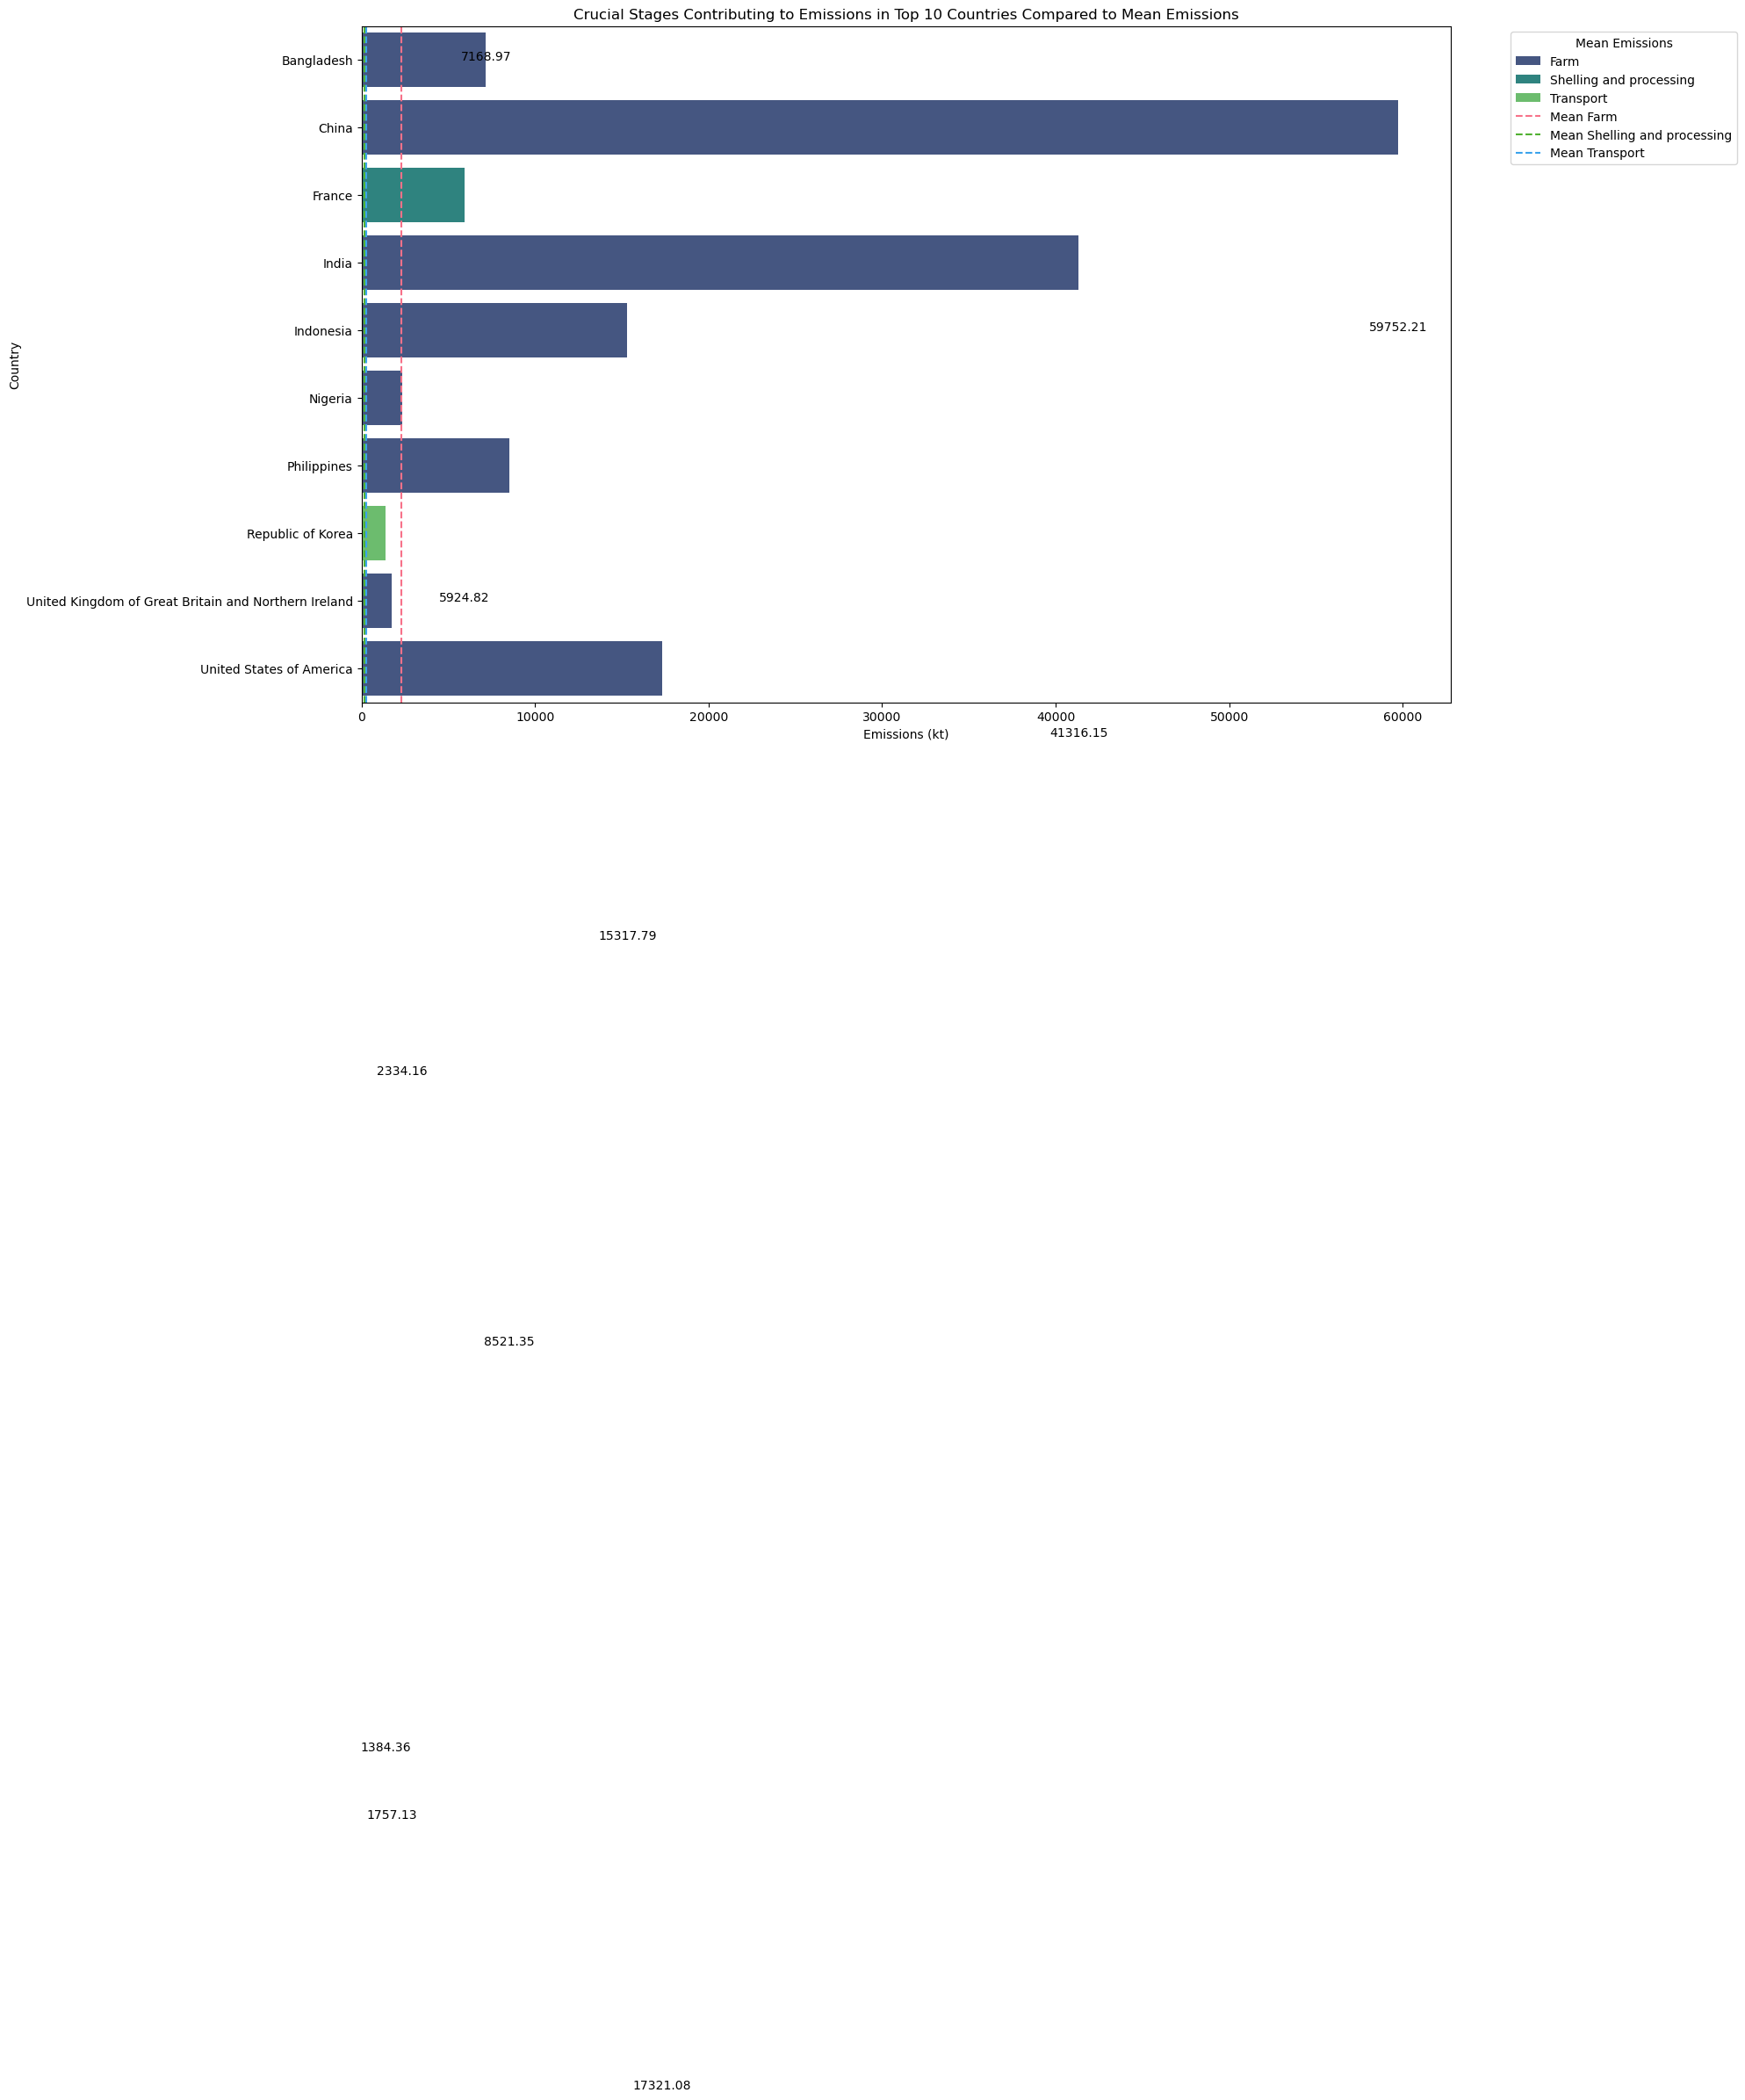

,food_supply_stage,mean_emissions
0,Farm,2288.067402
1,Shelling and processing,160.107997
2,Transport,254.914488


In [26]:
#Can we put the mean emissions values in the legend?

# Create a bar plot

plt.figure(figsize=(16, 10))
sns.barplot(x='emissions_quantity', y='country', hue='food_supply_stage', data=crucial_stages, palette='viridis', dodge=False)
for index, row in crucial_stages.iterrows():
    plt.text(row['emissions_quantity'], index, round(row['emissions_quantity'], 2), color='black', ha="center")

# Define colors for each stage
stage_colors = sns.color_palette('husl', len(mean_emissions_crucial_stages))

# Add a horizontal line for the mean emissions with different colors

for idx, stage in enumerate(crucial_stages['food_supply_stage'].unique()):
    mean_val = mean_emissions_crucial_stages[mean_emissions_crucial_stages['food_supply_stage'] == stage]['mean_emissions'].values[0]
    plt.axvline(mean_val, color=stage_colors[idx], linestyle='--', label=f'Mean {stage}')

# Add a legend for the mean emissions

plt.legend(title='Mean Emissions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Crucial Stages Contributing to Emissions in Top 10 Countries Compared to Mean Emissions')

plt.xlabel('Emissions (kt)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# From the mean_emissions_crucial_stages DataFrame, we extract just the stages in the graph (farm, transport, shell and processing)

mean_emissions_crucial_stages = mean_emissions_crucial_stages[mean_emissions_crucial_stages['food_supply_stage'].isin(['Farm', 'Transport', 'Shelling and processing'])].reset_index(drop=True)

mean_emissions_crucial_stages